In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'max nunber of cases and death in u.s states')

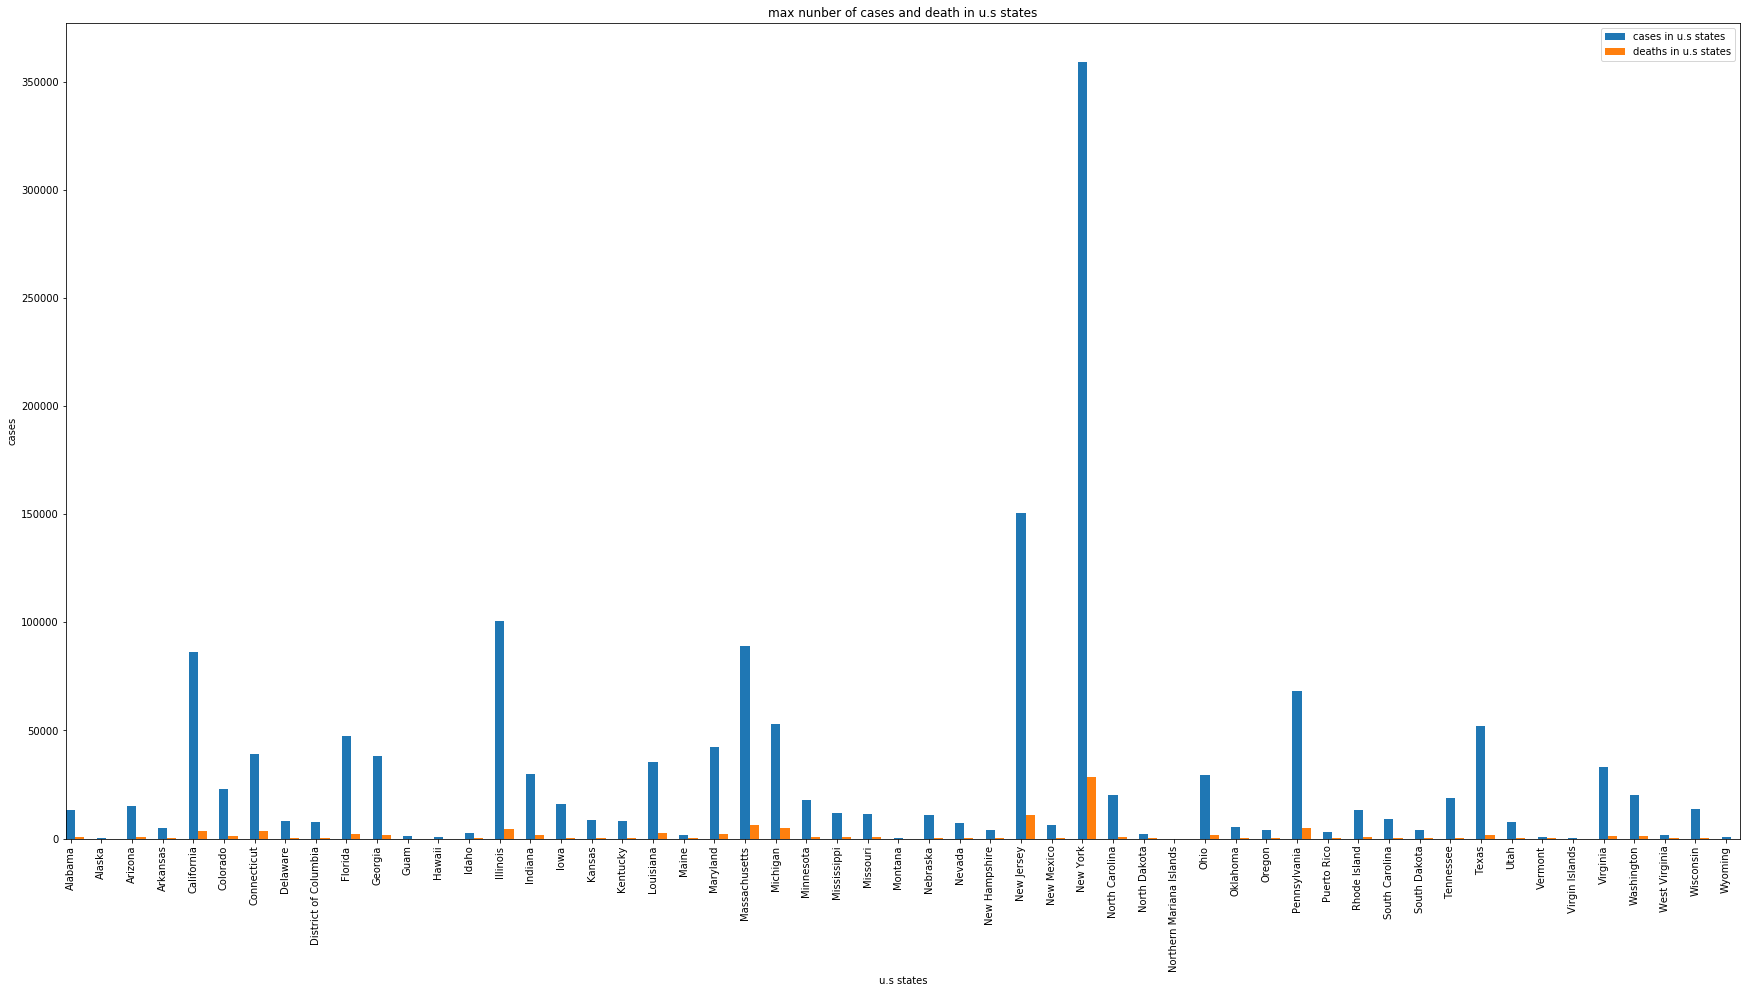

In [2]:
us_counties=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
us_counties=us_counties.reset_index()
#state=us_counties.groupby('state')['cases','deaths'].mean()
state=us_counties.groupby('state')['cases','deaths'].max()
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
bw=0.3
x=state.index
xline=np.arange((len(x)))
plt.xticks(xline,x)
plt.bar(xline,state.cases.values,bw,label='cases in u.s states')
plt.bar(xline+bw,state.deaths.values,bw,label='deaths in u.s states')
plt.gca().margins(x=0)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('u.s states')
plt.ylabel('cases')
plt.legend()
plt.title('max nunber of cases and death in u.s states')

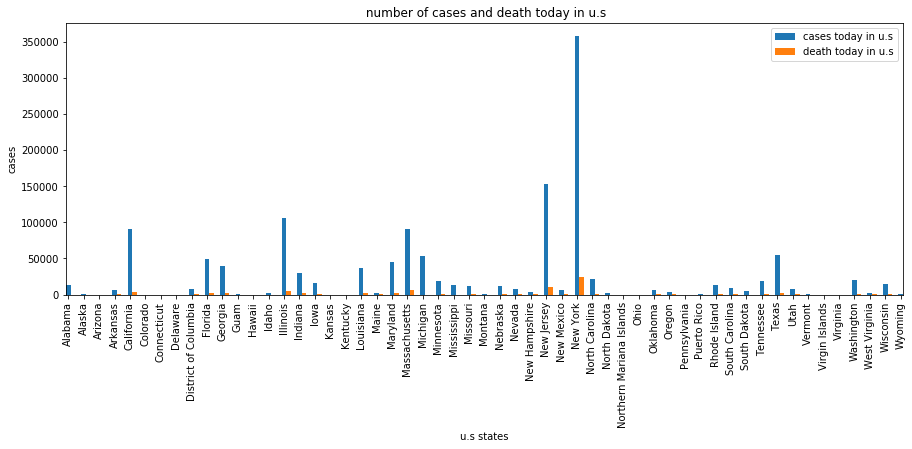

In [4]:
us_state_live=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-states.csv')
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.gca().margins(x=0)
bw=0.3
state=us_state_live['state']
xline=np.arange(len(state))
plt.xticks(xline,state)
plt.bar(xline,us_state_live.confirmed_cases,bw,label='cases today in u.s')
plt.bar(xline+bw,us_state_live.confirmed_deaths,bw,label='death today in u.s')
plt.xlabel('u.s states')
plt.ylabel('cases')
plt.title(' number of cases and death today in u.s')
plt.legend()

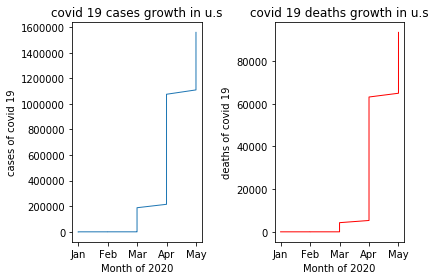

In [30]:
growth=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
growth['date']=pd.to_datetime(growth['date'])
growth['month_name']=growth['date'].dt.strftime('%b')
plt.figure()
plt.subplot(121)
#plt.xticks(rotation=90)
plt.plot(growth.month_name.values,growth.cases,lw=1,label='cases rise of covid 19 in 2020')
plt.xlabel('Month of 2020')
plt.ylabel('cases of covid 19')
#plt.legend()
plt.title('covid 19 cases growth in u.s')
plt.subplot(122)
plt.plot(growth.month_name.values,growth.deaths,lw=1,c='r',label='death rise of covid 19 in 2020')
plt.xlabel('Month of 2020')
plt.ylabel('deaths of covid 19')
plt.title('covid 19 deaths growth in u.s')
plt.tight_layout()

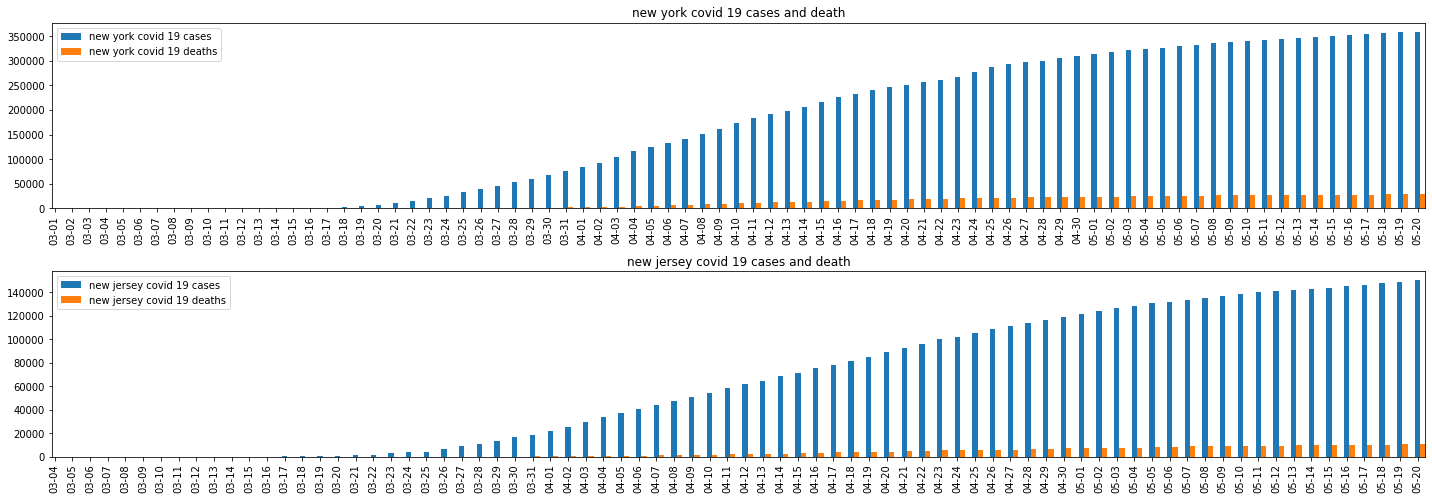

In [25]:
compare=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-states.csv')
compare=compare.set_index('state')
top4=compare['confirmed_cases'].nlargest(5)
top4_compare=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
#top4
#New York         356542.0
#New Jersey       151472.0
top4_compare['date']=pd.to_datetime(top4_compare['date'])
top4_compare['month']=top4_compare['date'].dt.strftime('%m-%d')
ny=top4_compare[(top4_compare['state']=='New York')]

mon=ny['month']
xline=np.arange(len(mon))
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
bw=0.3
plt.xticks(xline,mon)
plt.xticks(rotation=90)
plt.gca().margins(x=0)
plt.bar(xline,ny.cases,bw,label='new york covid 19 cases')
plt.bar(xline+bw,ny.deaths,bw,label='new york covid 19 deaths')
plt.legend()
plt.title('new york covid 19 cases and death')

nj=top4_compare[(top4_compare['state']=='New Jersey')]

mon=nj['month']
xline=np.arange(len(mon))

plt.subplot(3,1,2)
bw=0.3
plt.xticks(xline,mon)
plt.xticks(rotation=90)
plt.gca().margins(x=0)
plt.bar(xline,nj.cases,bw,label='new jersey covid 19 cases')
plt.bar(xline+bw,nj.deaths,bw,label='new jersey covid 19 deaths')
plt.legend()
plt.title('new jersey covid 19 cases and death')
plt.tight_layout()


Text(0.5, 1.0, 'visualizing covid 19 tests in u.s')

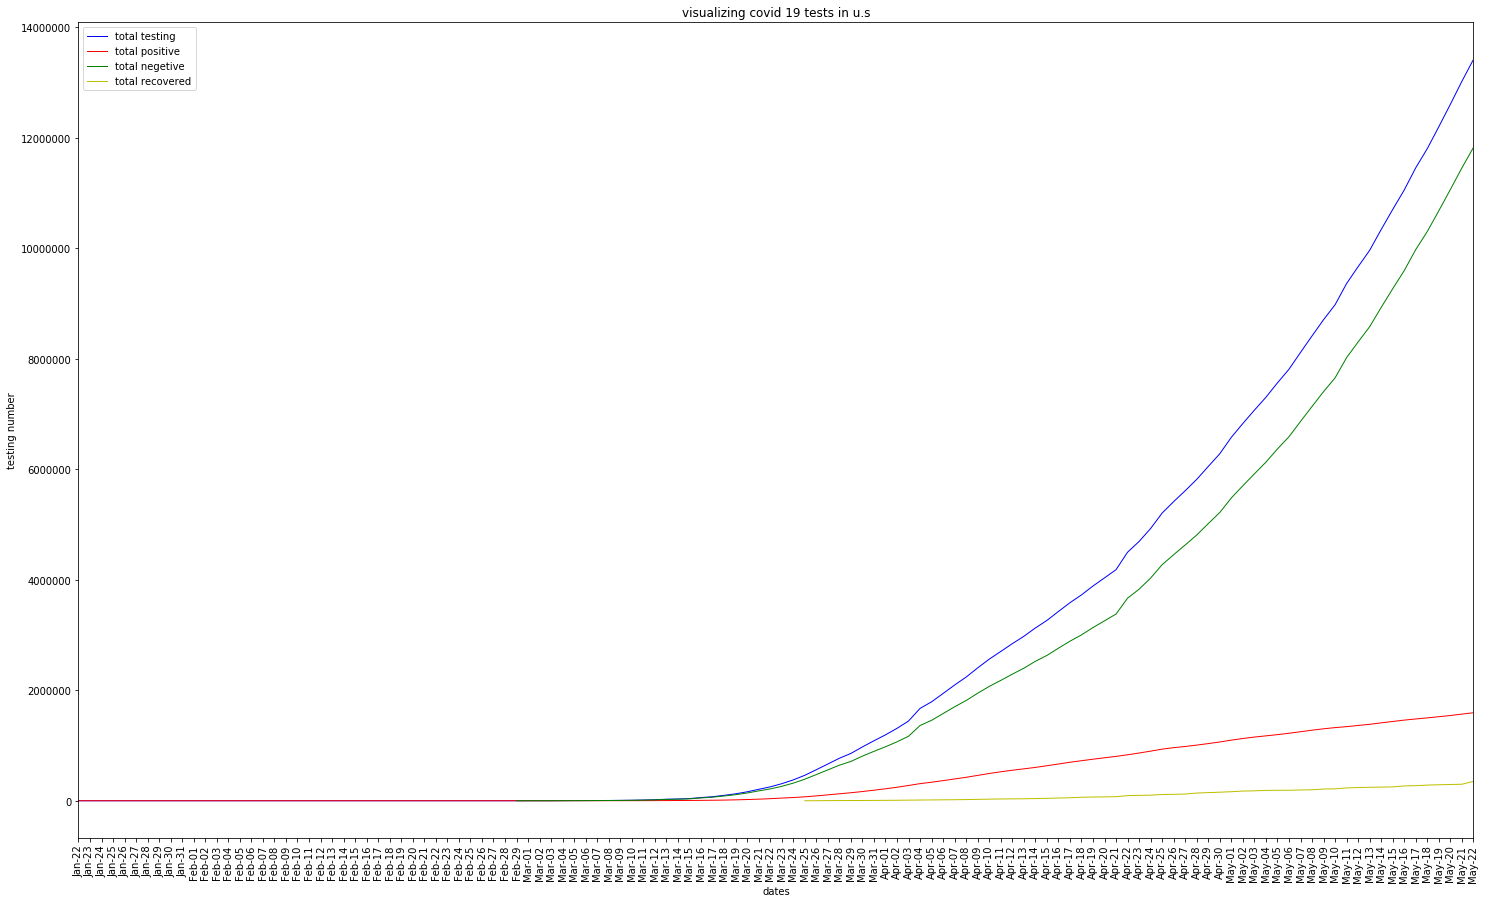

In [5]:
testing_growth=pd.read_csv('https://raw.githubusercontent.com/COVID19Tracking/covid-public-api/master/v1/us/daily.csv')
#testing_growth['date']=pd.to_datetime(testing_growth['date'])
nird=[]
ft=testing_growth['date']
for dt in ft:
    nir=str(dt)
    nir=nir[:4]+'-'+nir[4:6]+'-'+nir[6:8]
    nird.append(nir)
testing_growth['date']=nird

testing_growth['date']=pd.to_datetime(testing_growth['date'])
testing_growth=testing_growth.sort_values(by='date')
testing_growth['month_name']=testing_growth['date'].dt.strftime('%b-%d')
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
ax = plt.gca()
ax.margins(x=0)
ax.ticklabel_format(style='plain', axis='y')
plt.plot(testing_growth.month_name.values,testing_growth.totalTestResults.values,lw=1,c='b',label='total testing')
plt.plot(testing_growth.month_name.values,testing_growth.positive.values,lw=1,c='r',label='total positive')
plt.plot(testing_growth.month_name.values,testing_growth.negative.values,lw=1,c='g',label='total negetive')
plt.plot(testing_growth.month_name.values,testing_growth.recovered.values,lw=1,c='y',label='total recovered')
plt.legend()
plt.xlabel('dates')
plt.ylabel('testing number')
plt.title('visualizing covid 19 tests in u.s')

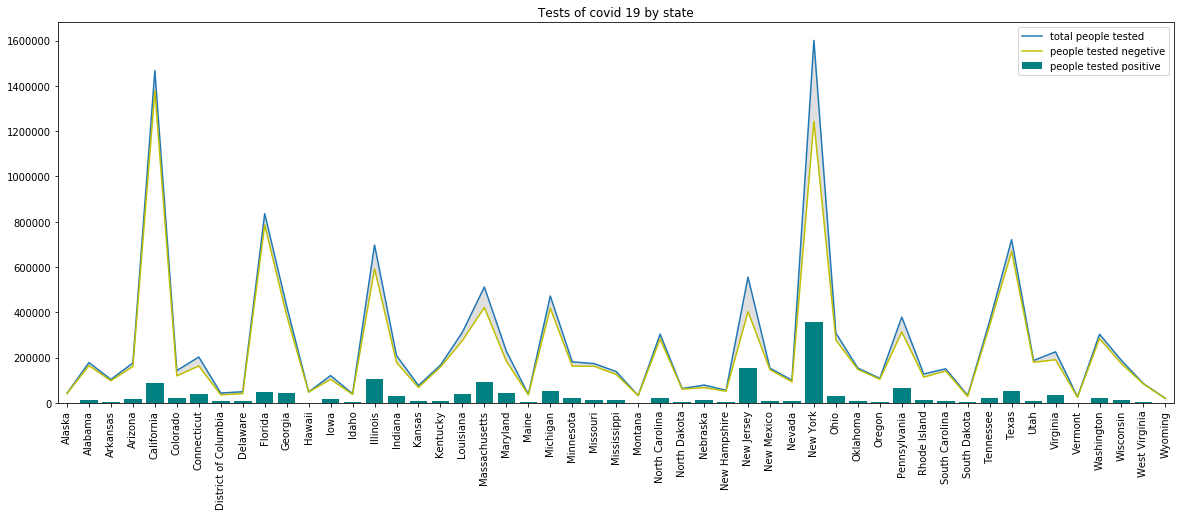

In [3]:
testing=pd.read_csv('https://query.data.world/s/ltynq2t5zpzrgz5jczu6dor2fxy3bt')
testing.head()
#total_people_tested 	positive 	negative
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().margins(x=0)
plt.plot(testing.state.values,testing.total_people_tested,label='total people tested')
plt.bar(testing.state.values,testing.positive,color='teal',label='people tested positive')
plt.plot(testing.state.values,testing.negative,color='y',label='people tested negetive')
plt.title('Tests of covid 19 by state')
plt.gca().fill_between(testing.state.values,testing.total_people_tested,testing.negative,facecolor='gray',alpha=0.25)
plt.legend()